## GINI计算 不同结果，此文件之后删除或者合并到 attest.ipynb 中

import pandas as pd
import time
import datetime
import numpy as np
import math
from glob import glob
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # 使用TeX格式



In [ ]:
def Gini_rank(agent_reward):
    reward_values = np.sort(agent_reward)
    
    Mean = np.mean(reward_values)
    Amount_n = len(reward_values)
    sum_i = 0
    
    for i, xi in enumerate(reward_values):
        sum_i += (i+1) * (xi - Mean) 
        
    gini_index = (2 * sum_i) / (pow(Amount_n,2) * Mean)
    
    return gini_index

In [3]:
file_path = '/srv/abacus-3/Ethereum_token_txs_data/rewards/ETH_reward_validator_daily_sum_count_2M.csv'
reward_day = pd.read_csv(file_path)
Date_list = np.unique(reward_day.Date)
Date_list = Date_list[1:-1]

In [75]:
reward_day.columns

Index(['Date', 'Validator_index', 'final_total_count', 'final_total_sum',
       'proposer_count', 'proposer_sum', 'attest_count', 'attest_sum',
       'sync_count', 'sync_sum', 'epoch_count'],
      dtype='object')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2022-11-06'),
  Text(0.0, 0, '2022-09-16'),
  Text(10.0, 0, '2022-09-26'),
  Text(20.0, 0, '2022-10-06'),
  Text(30.0, 0, '2022-10-16'),
  Text(40.0, 0, '2022-10-26'),
  Text(50.0, 0, '2022-11-05'),
  Text(60.0, 0, '2022-11-15'),
  Text(70.0, 0, '')])

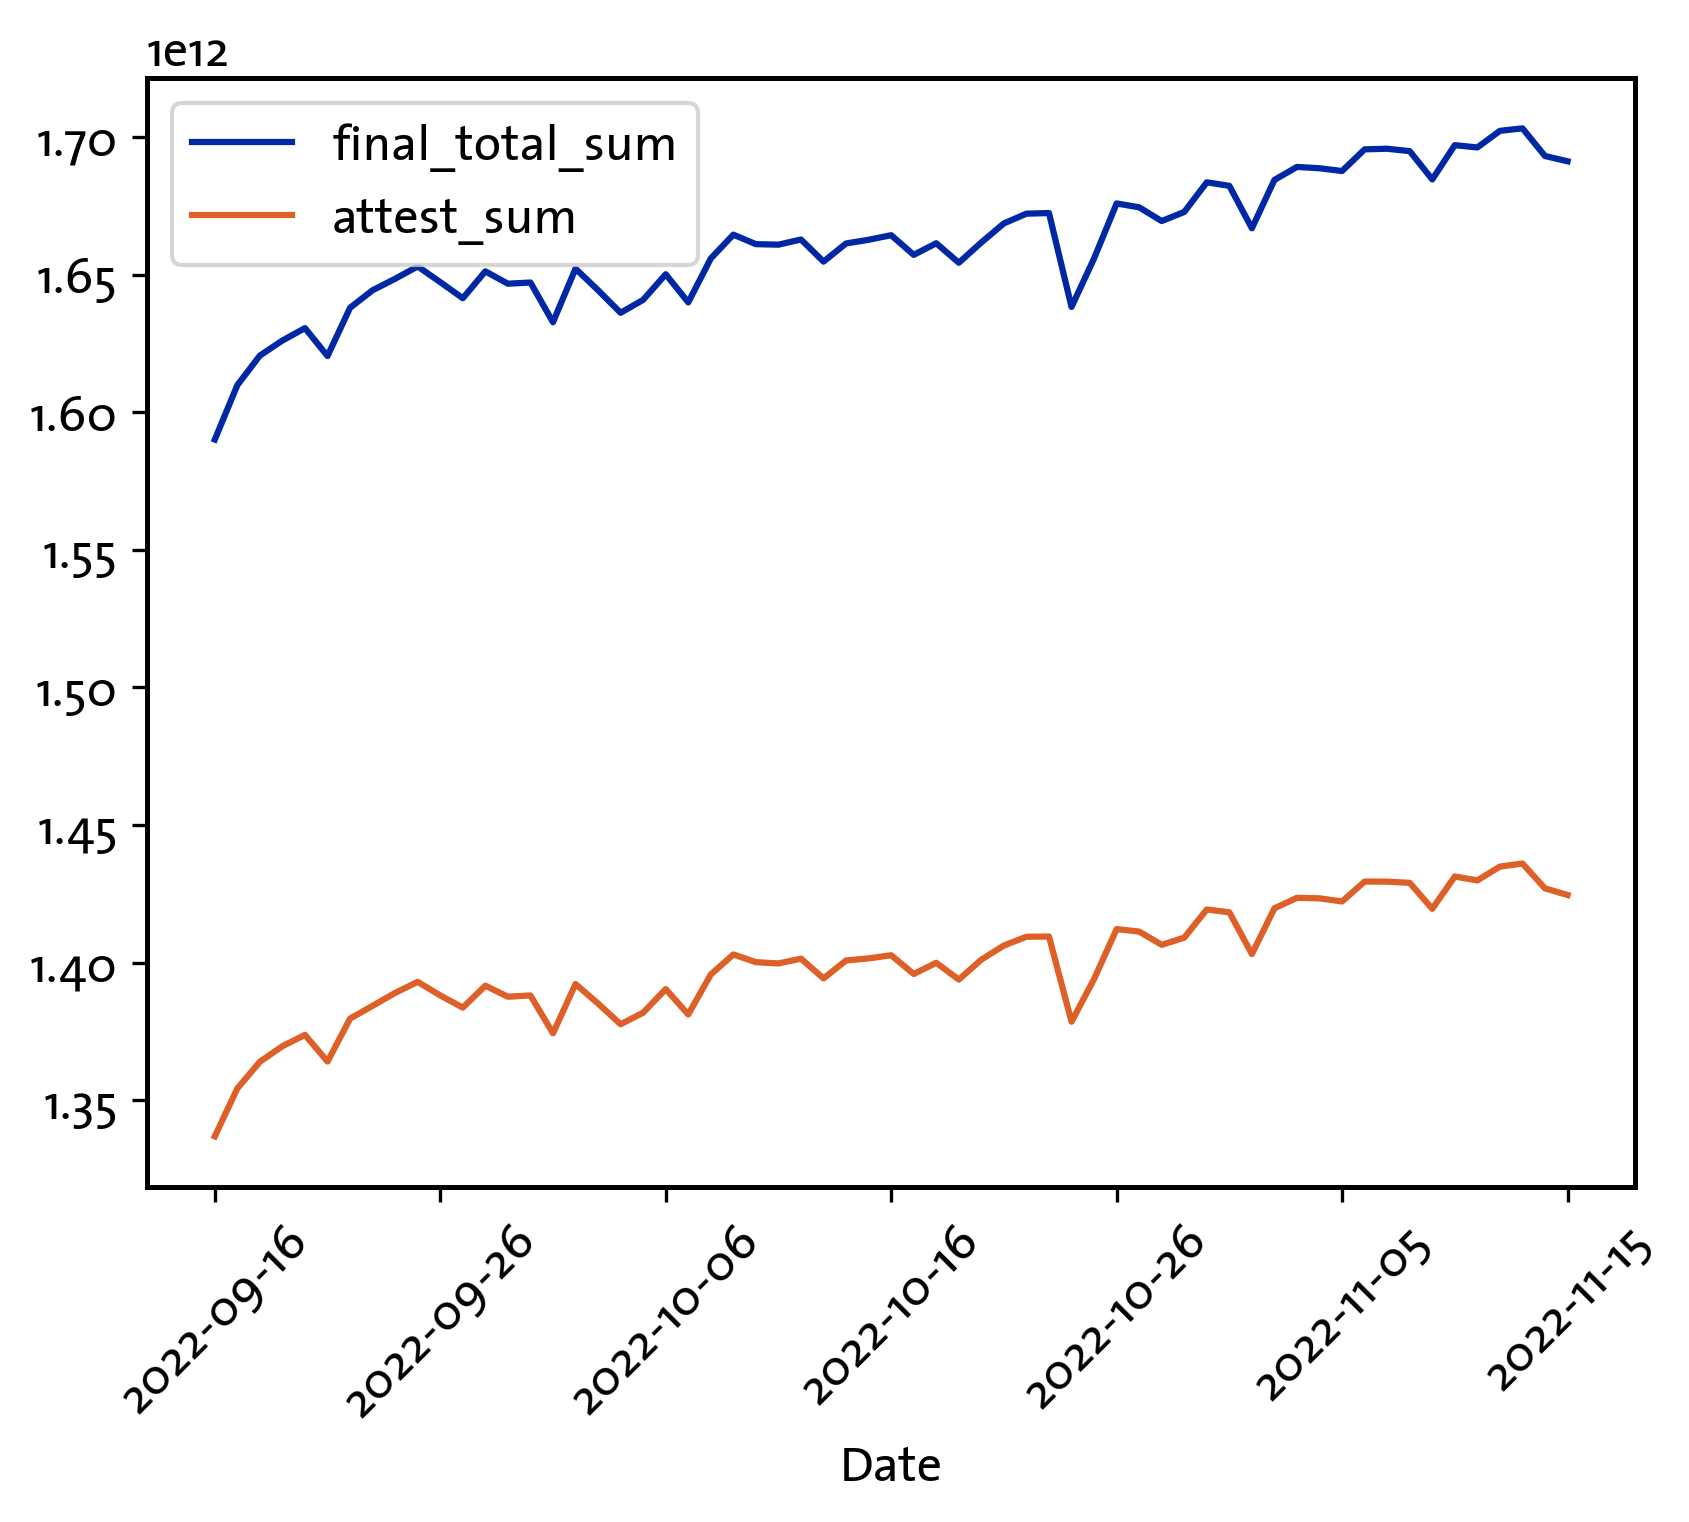

In [95]:
xx=reward_day.groupby('Date')[['final_total_sum','attest_sum']].sum()
yy=xx[1:-1]
yy.plot()
plt.xticks(rotation=45)

In [139]:
total_reward=pd.read_csv('/srv/abacus-3/Ethereum_token_txs_data/rewards/total_reward_sum_daily.csv')
total_reward['final_total_reward']=total_reward['final_total_reward']/10**9
total_reward['proposer_total_reward']=total_reward['proposer_total_reward']/10**9
total_reward['attestation_total_reward']=total_reward['attestation_total_reward']/10**9
total_reward['sync_total_reward']=total_reward['sync_total_reward']/10**9


In [142]:
total_reward=total_reward[1:-1]
px.bar(total_reward,x=total_reward.index,y='final_total_reward')

In [ ]:
total_reward=reward_day.groupby('Date')[['final_total_sum']].sum()
total_reward['final_total_sum']=total_reward['final_total_sum']/10**9
import plotly.express as px
px.bar(total_reward[1:-1], x=total_reward[1:-1].index, y='final_total_sum')


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2022-11-06'),
  Text(0.0, 0, '2022-09-16'),
  Text(10.0, 0, '2022-09-26'),
  Text(20.0, 0, '2022-10-06'),
  Text(30.0, 0, '2022-10-16'),
  Text(40.0, 0, '2022-10-26'),
  Text(50.0, 0, '2022-11-05'),
  Text(60.0, 0, '2022-11-15'),
  Text(70.0, 0, '')])

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


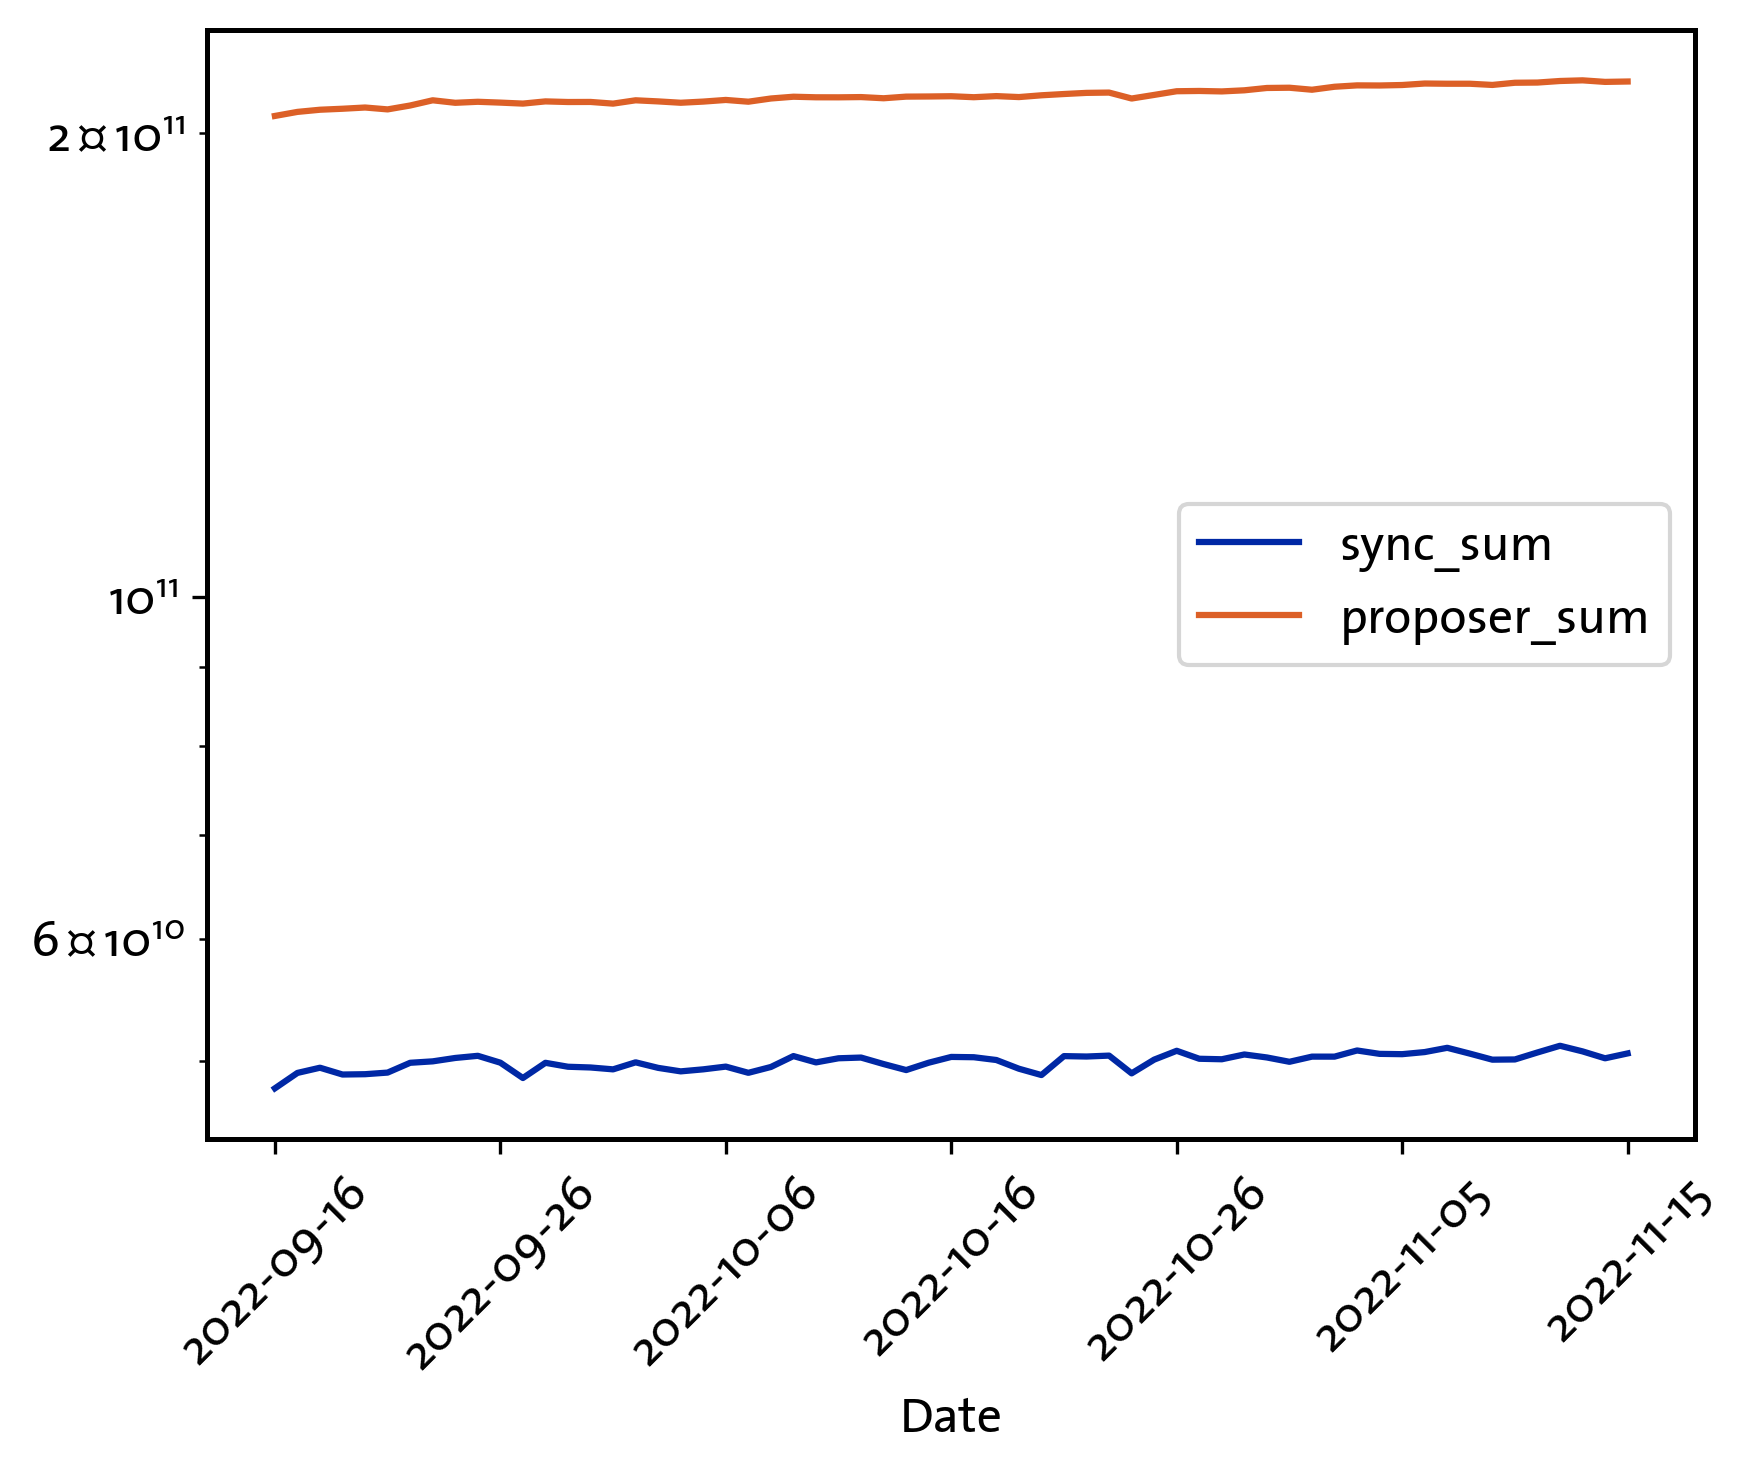

In [ ]:
xx=reward_day.groupby('Date')[['sync_sum','proposer_sum']].sum()
yy=xx[1:-1]
yy.plot()
plt.yscale('log')
plt.xticks(rotation=45)

In [ ]:
yy

,final_total_sum
Date,
2022-09-16,1590077563921
2022-09-17,1609852666621
2022-09-18,1620597143023
2022-09-19,1626062887292
2022-09-20,1630566542341
...,...
2022-11-11,1696201268342
2022-11-12,1702237056849
2022-11-13,1703147047751


HHI index

In [ ]:
def HHI(arr):
    market_shares = [i / sum(arr) for i in arr]
    hhi = sum(share ** 2 for share in market_shares)
    return hhi
HHI(list(range(100,200,10)))

0.10392390011890607

In [ ]:
Gini_rank(list(range(100,200,10)))
Gini_rank(list(range(500,600,10)))


0.030275229357798167

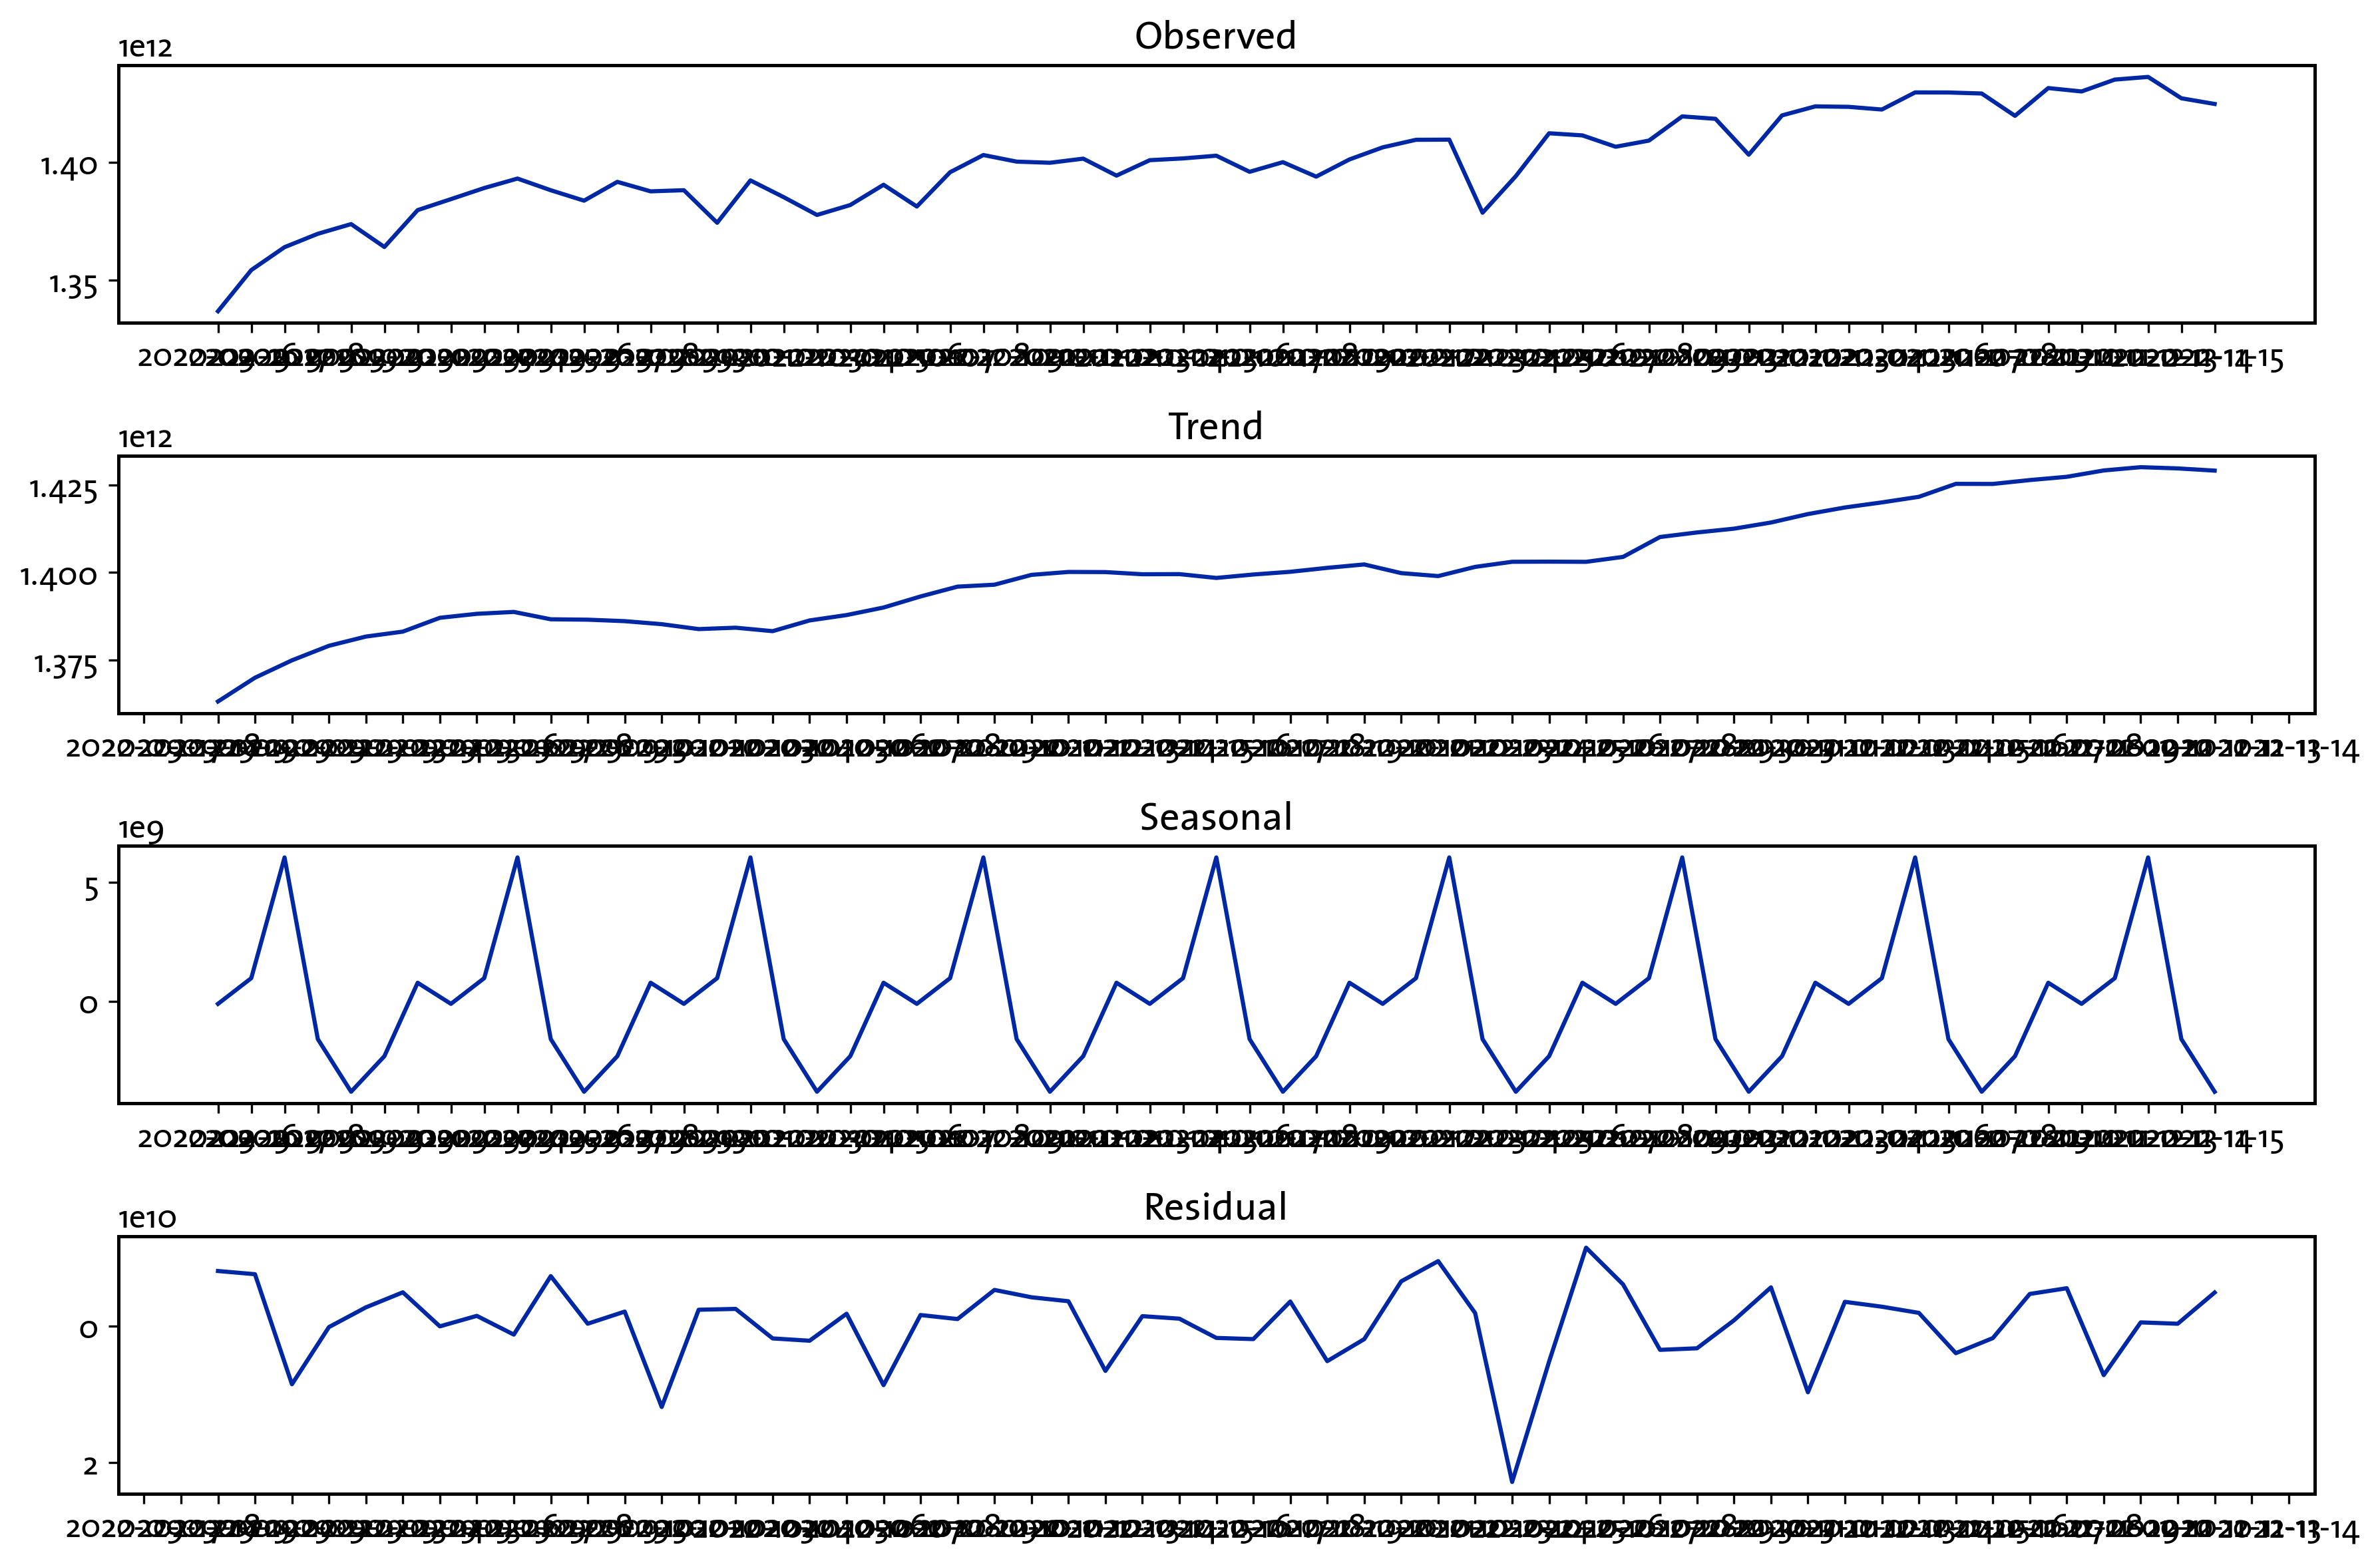

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 进行Seasonal Decompose分解
result = seasonal_decompose(yy['attest_sum'], model='additive',period=7)  

# 绘制分解后的结果
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


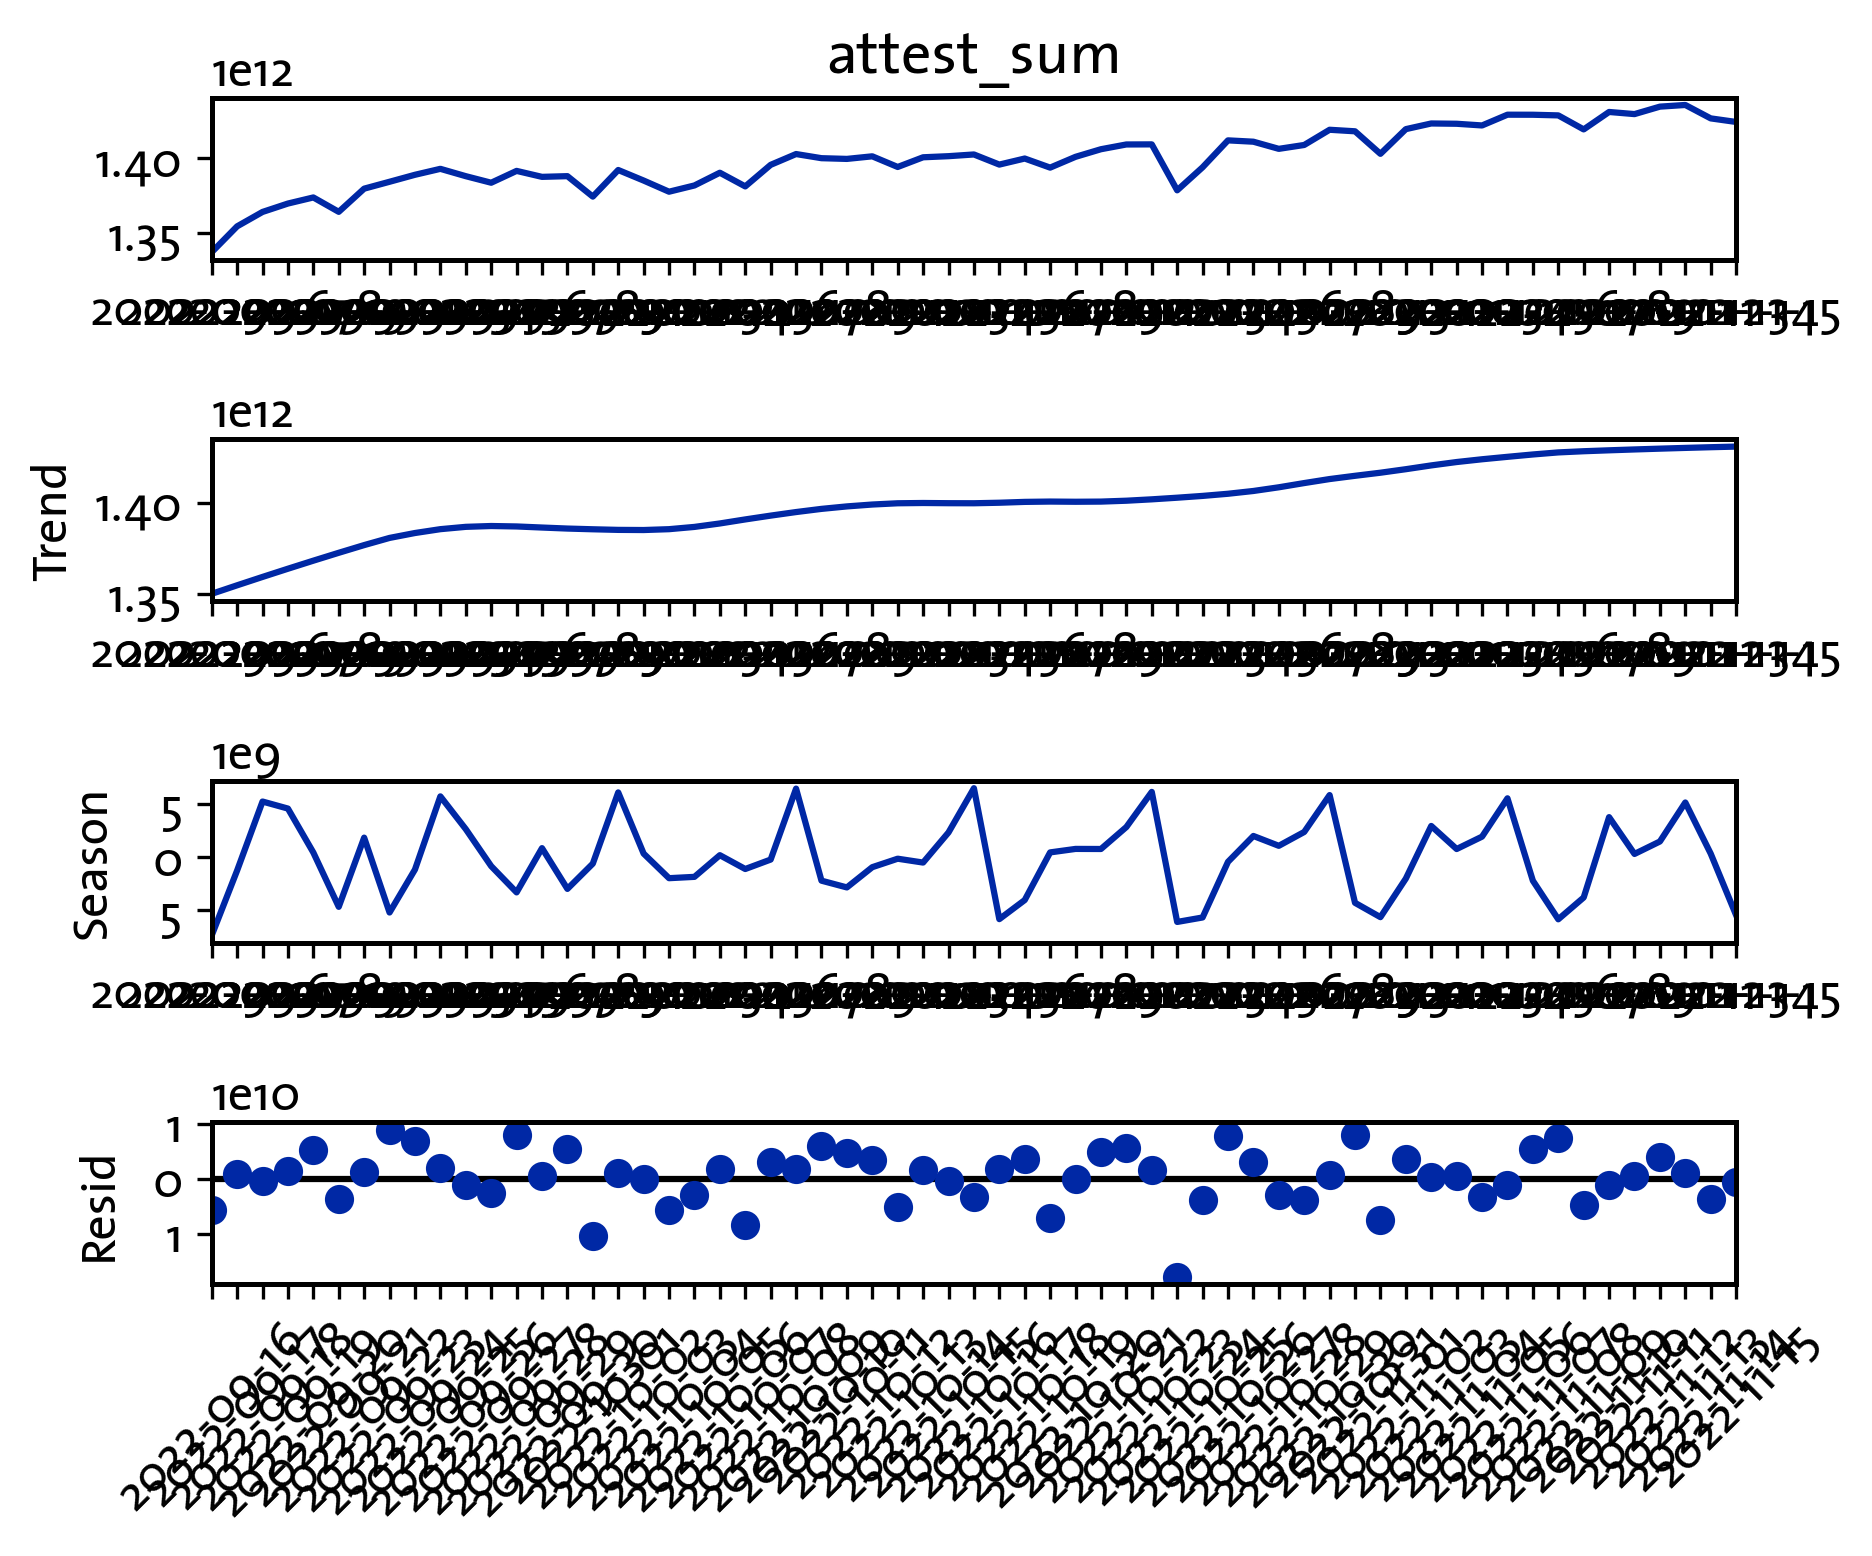

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt



# 进行STL分解
stl = STL(yy['attest_sum'],7)  # 13表示季节性周期为13（例如，月度数据的季节性周期为12个月）
result = stl.fit()

# 绘制分解后的结果
fig = result.plot()
#x轴标签旋转45度
plt.xticks(rotation =45)
plt.show()

In [ ]:
#检验是否具有周期性


In [ ]:
#final total reward

Gini_day = {}

for t, each_day in enumerate(Date_list):
    # print(t)
    reward_eachday = reward_day[reward_day.Date == each_day]
    
    validator_reward = reward_eachday.final_total_sum.values
        
    validator_reward_negative = [0 if i < 0 else i for i in validator_reward]
            
    Gini_day[each_day] = Gini_rank(validator_reward_negative)

(array([19250., 19257., 19266., 19273., 19280., 19287., 19297., 19304.,
        19311.]),
 [Text(19250.0, 0, '2022-09-15'),
  Text(19257.0, 0, '2022-09-22'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19273.0, 0, '2022-10-08'),
  Text(19280.0, 0, '2022-10-15'),
  Text(19287.0, 0, '2022-10-22'),
  Text(19297.0, 0, '2022-11-01'),
  Text(19304.0, 0, '2022-11-08'),
  Text(19311.0, 0, '2022-11-15')])

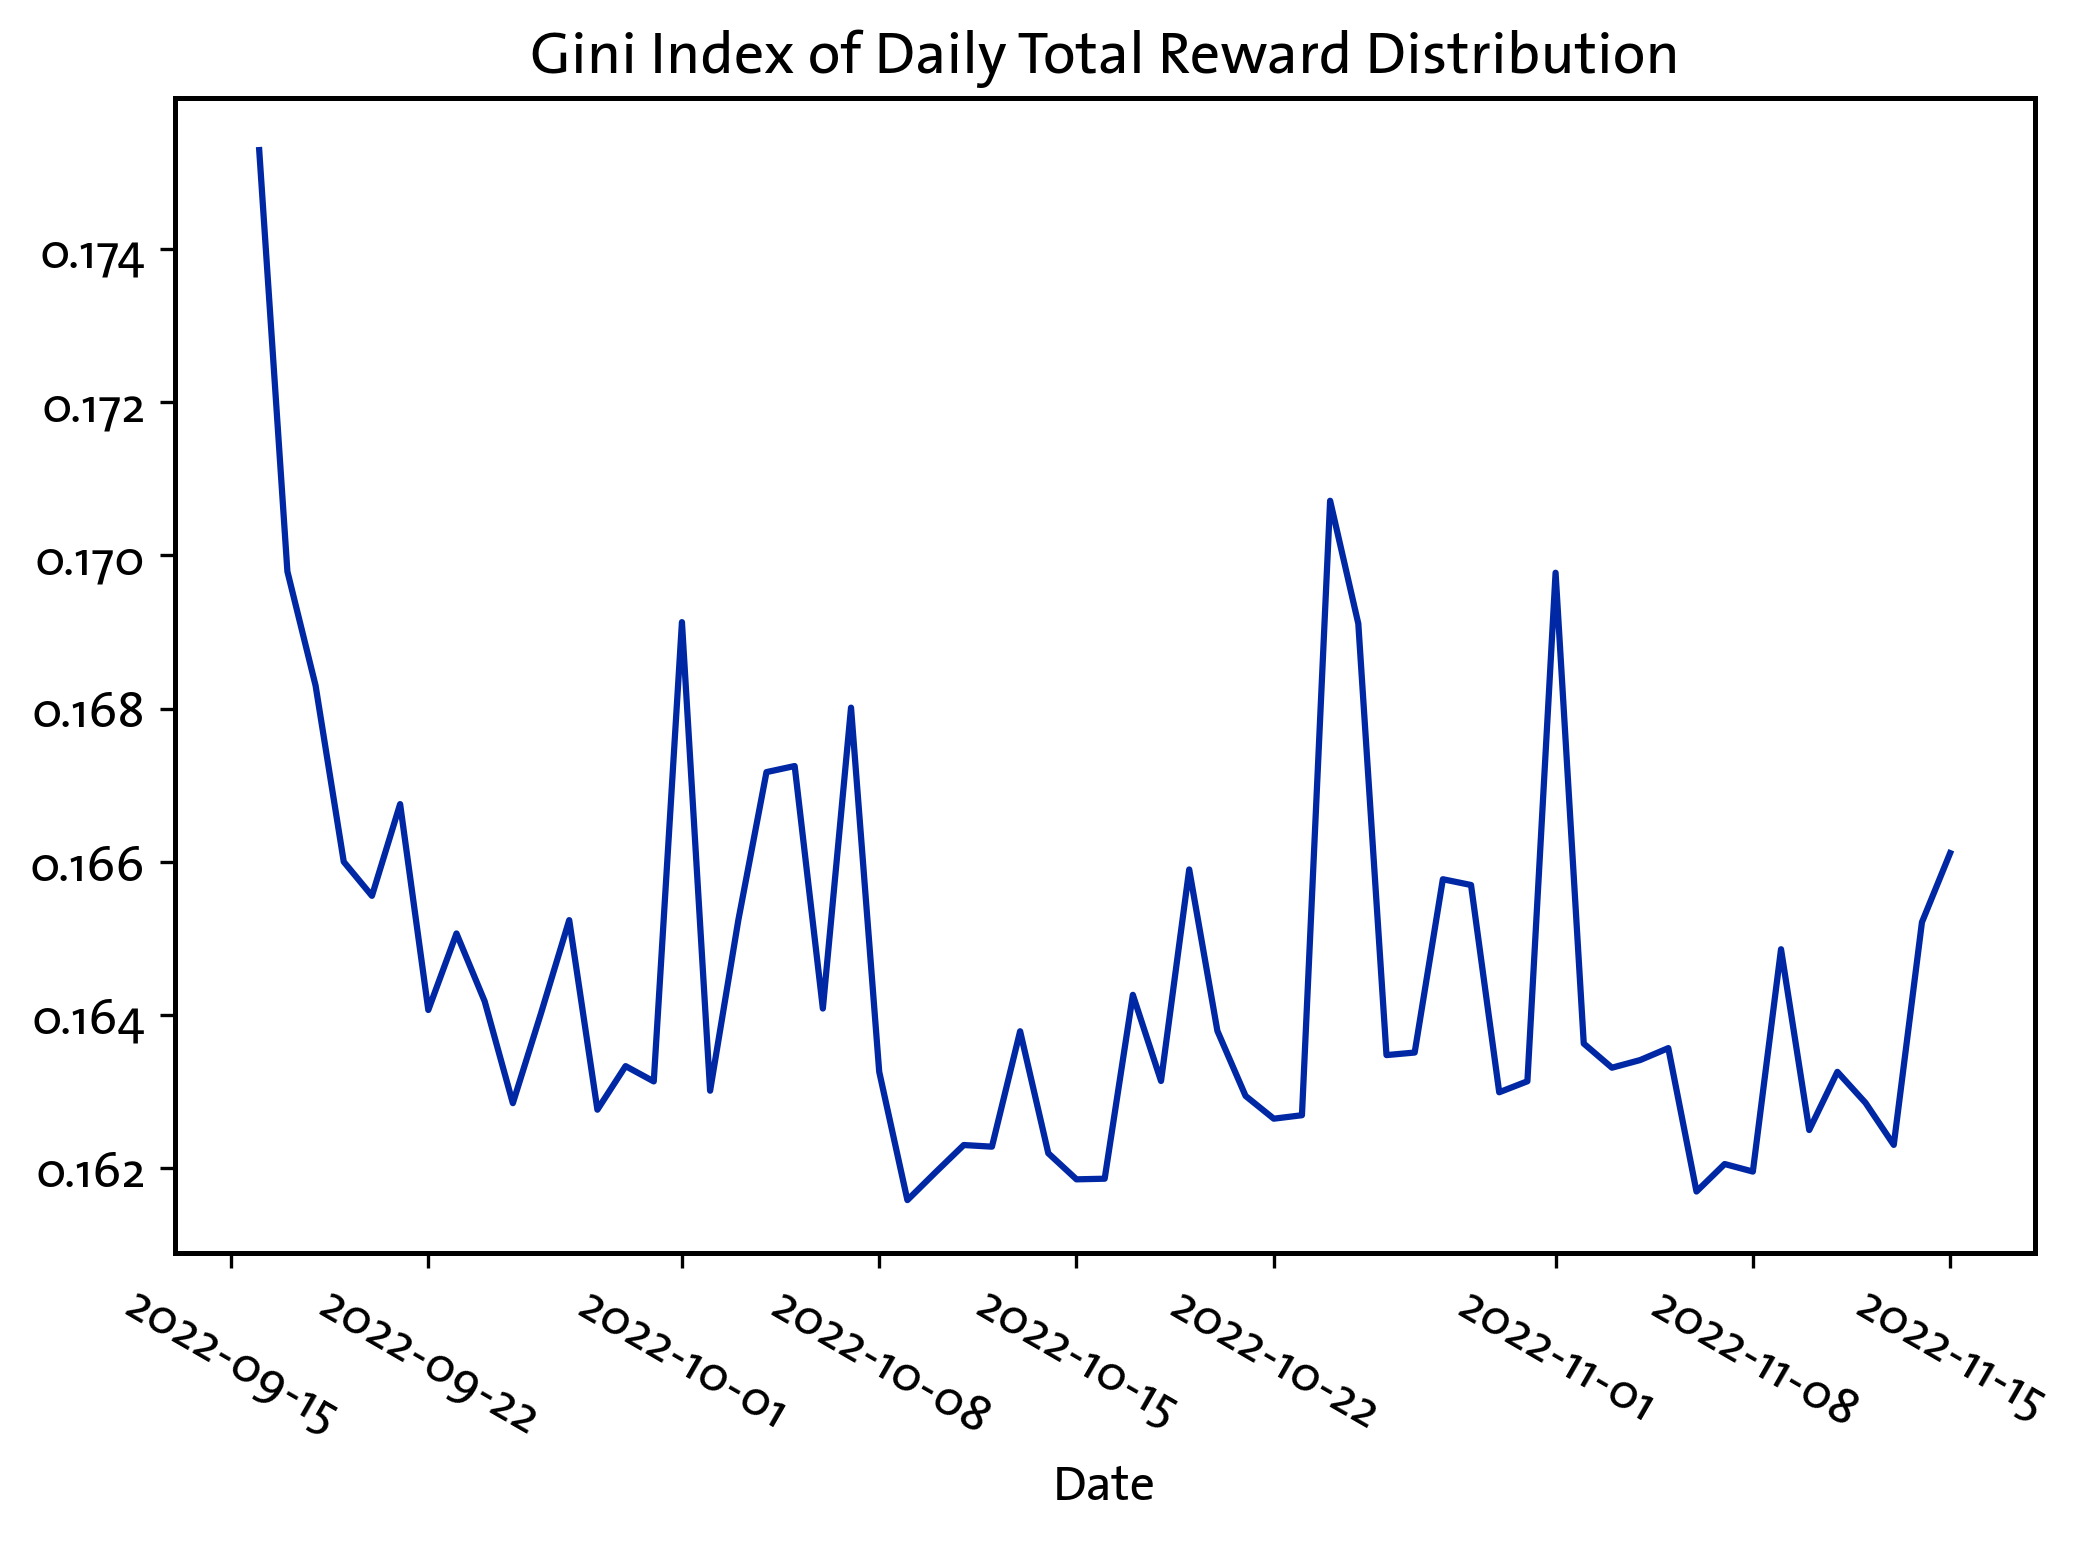

In [ ]:
fig=plt.figure(figsize=(8,5))

X_day = list(Gini_day.keys())
X_day_date = [datetime.datetime.strptime(datetime_str,'%Y-%m-%d') for datetime_str in X_day ]
Y_gini = Gini_day.values()

plt.plot(X_day_date, Y_gini)
plt.title('Gini Index of Daily Total Reward Distribution')
plt.xlabel('Date')

plt.xticks(rotation = 330)

# plt.savefig('./Output_plot/Daily total reward_Gini.png', dpi=200)

In [ ]:
#把X_day_date和Y_gini组合成 dataframe
df = pd.DataFrame({'Date':X_day_date, 'Gini':Y_gini})
df=df.set_index('Date')


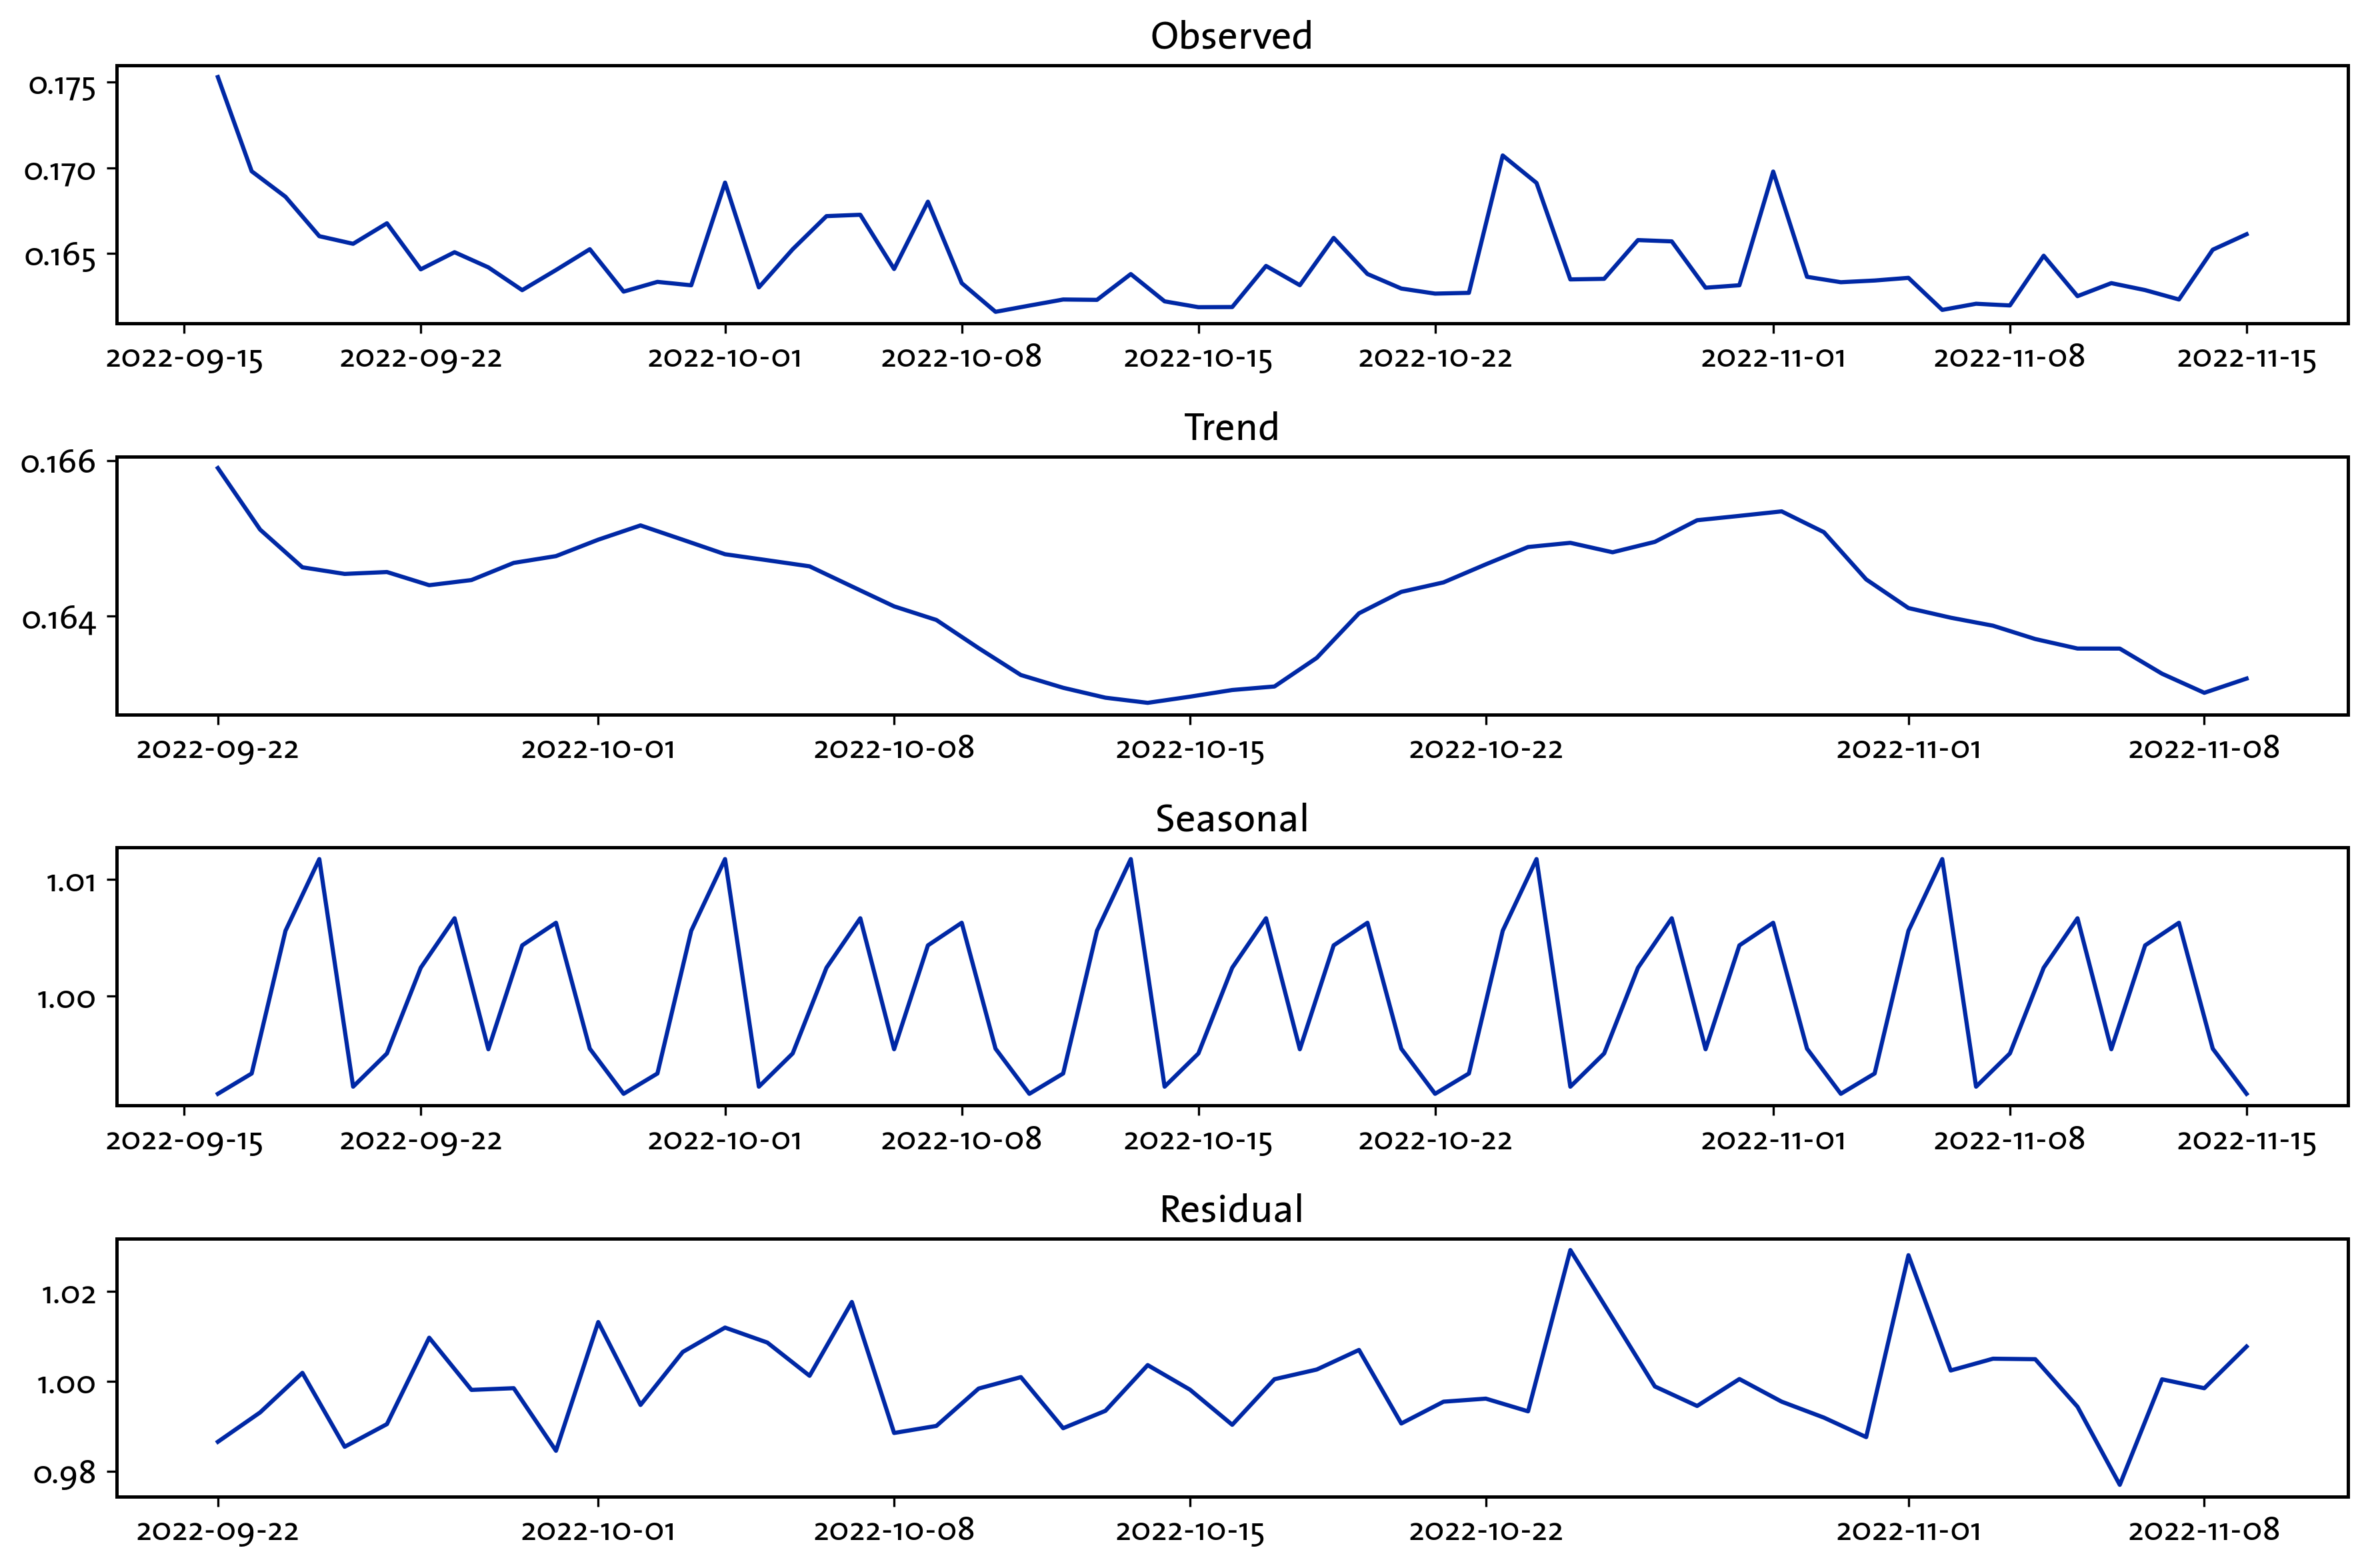

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 进行Seasonal Decompose分解
result = seasonal_decompose(df, model='multiplicative',period=12)  

# 绘制分解后的结果
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


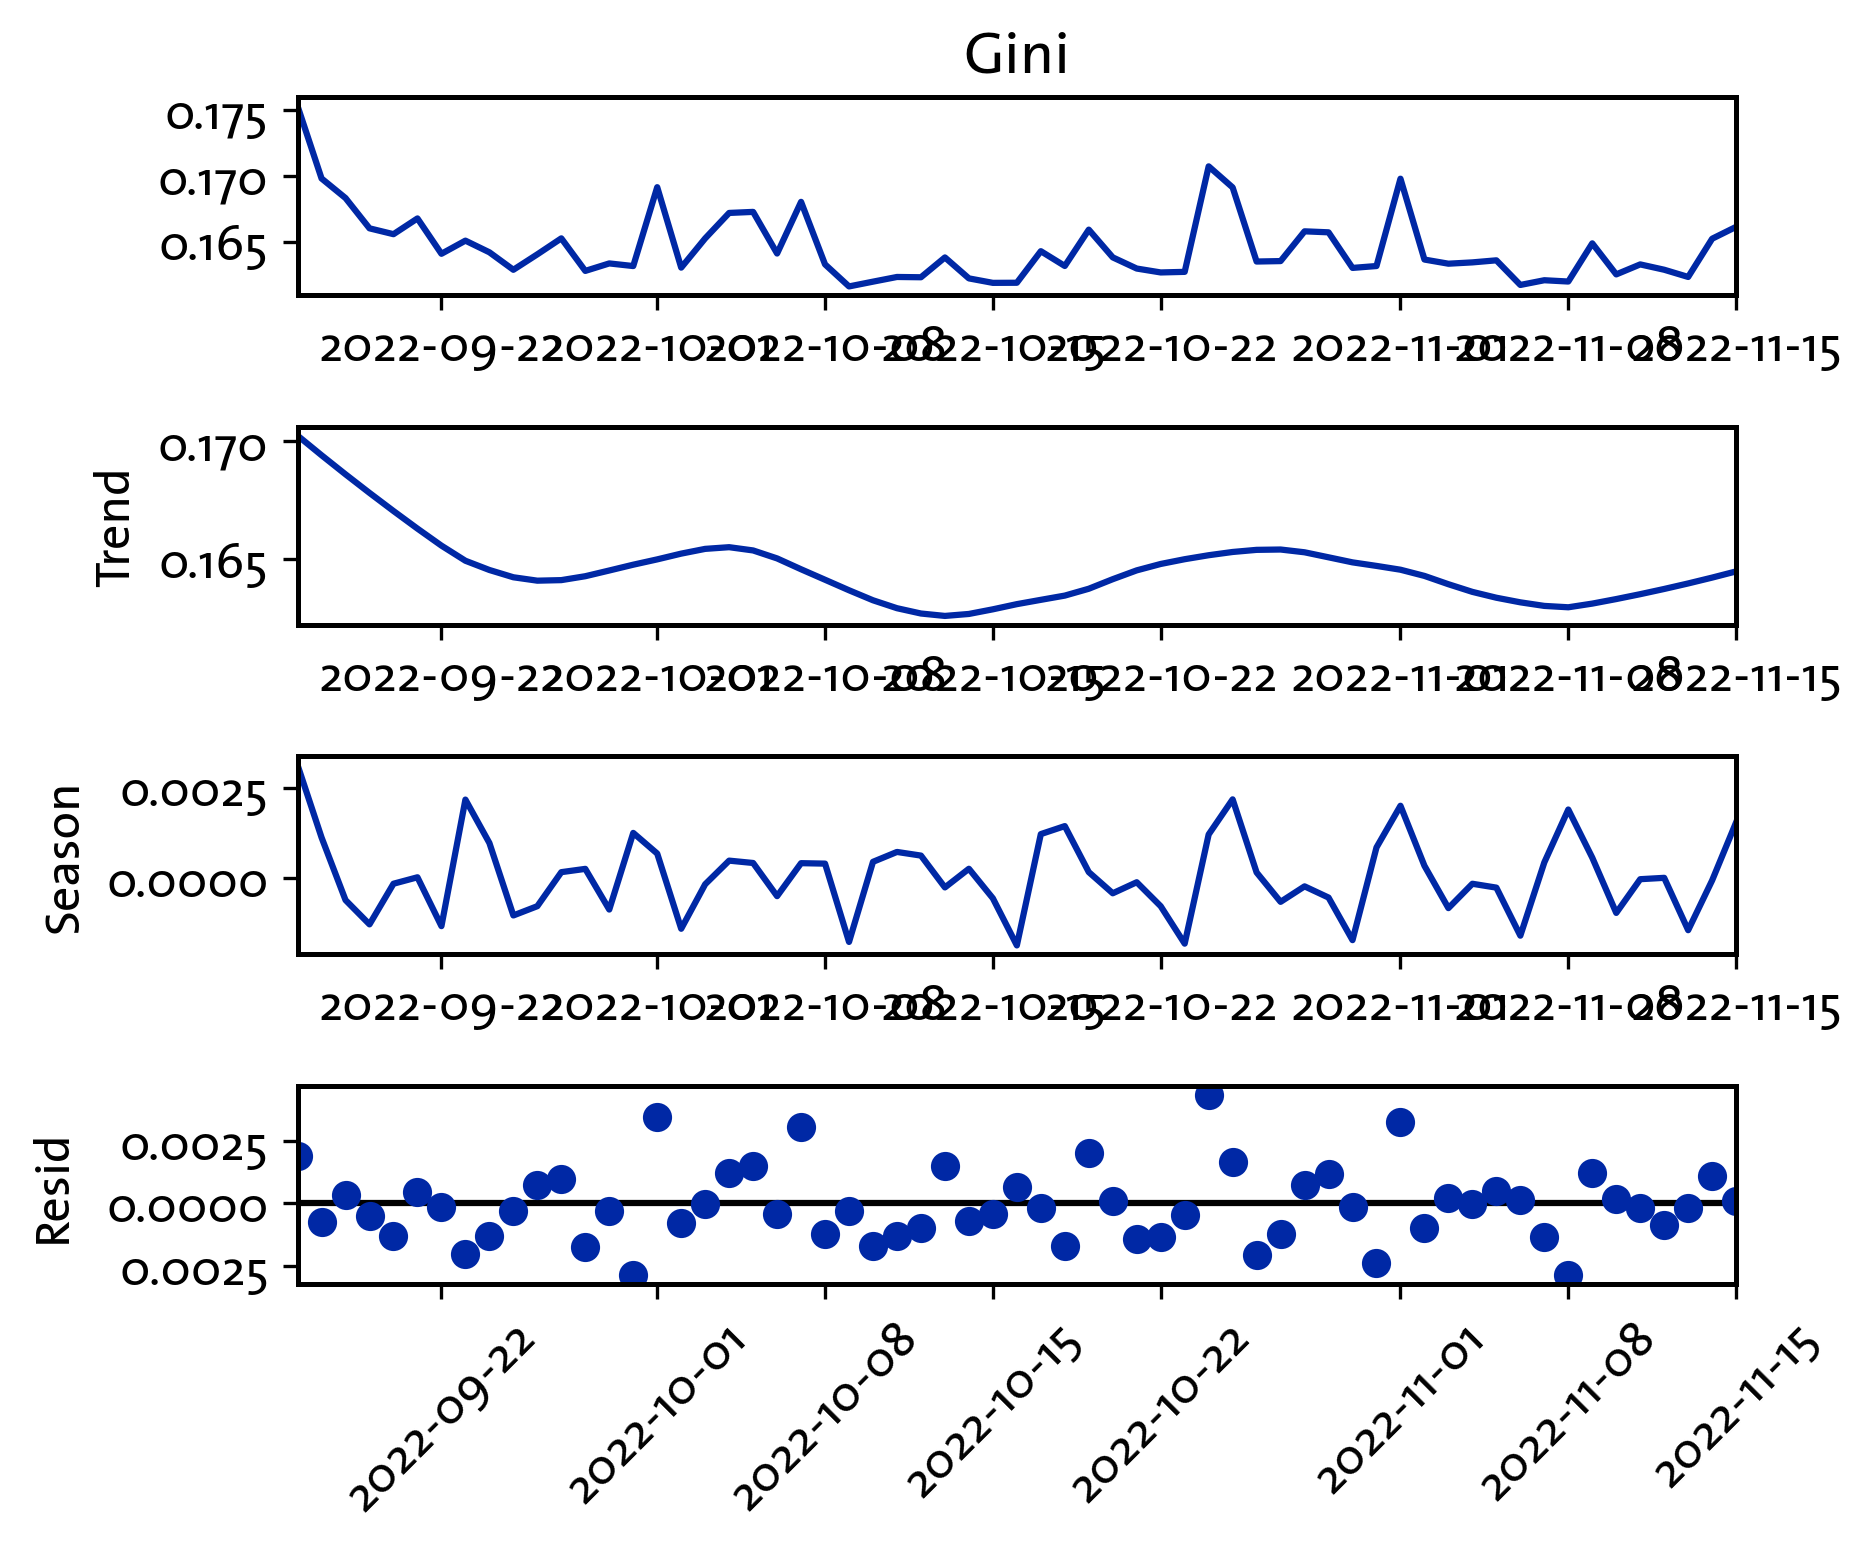

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# 读取时间序列数据（假设数据已经存储在DataFrame中，且时间列为'date'，数值列为'value'）
# df = pd.read_csv('your_data.csv')
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# 进行STL分解
stl = STL(df['Gini'])  # 13表示季节性周期为13（例如，月度数据的季节性周期为12个月）
result = stl.fit()

# 绘制分解后的结果
fig = result.plot()
#x轴标签旋转45度
plt.xticks(rotation =45)
plt.show()


## seasonal test

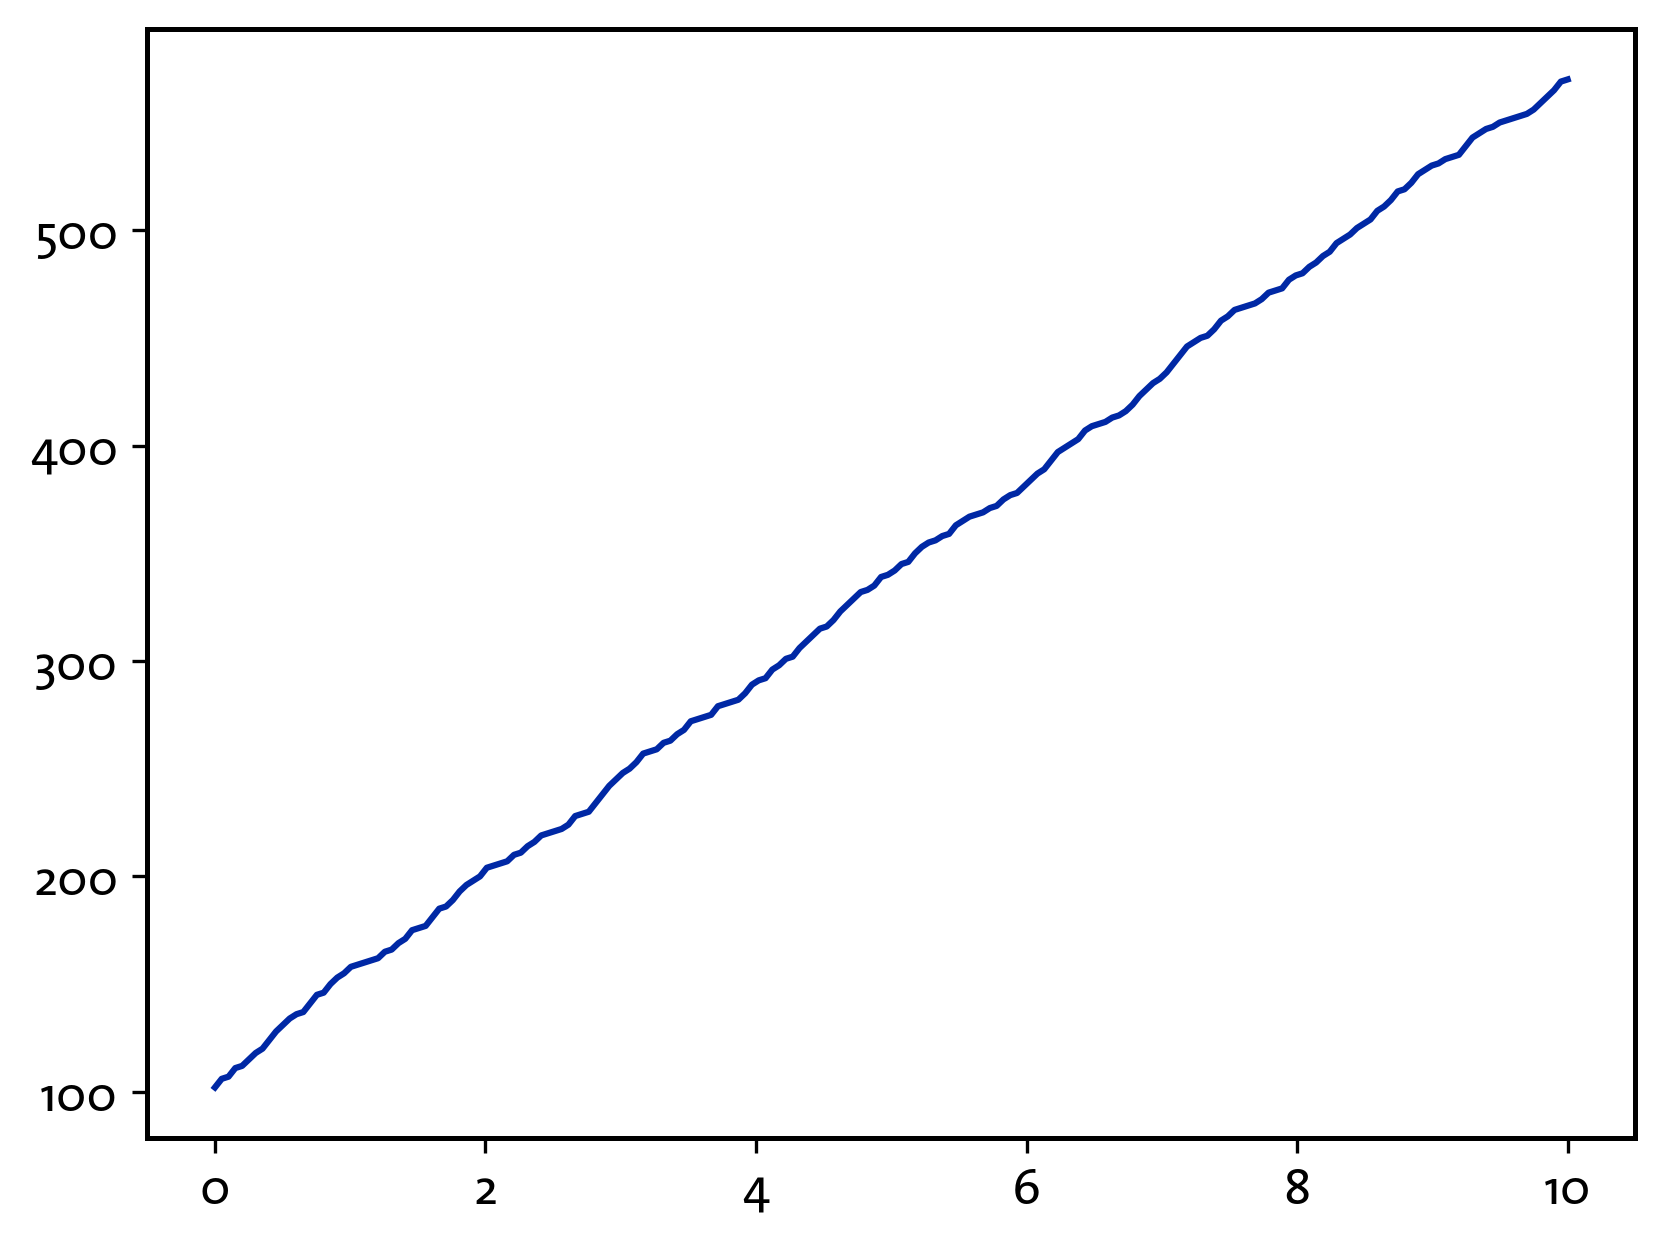

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成时间序列数据,200个点， 第一个点是 100，以后的数据在前一个数据上面增加 1-5 之间的随机数

t = np.linspace(0, 10, 200)
y = np.cumsum(np.random.randint(1, 5, 200)) + 100
plt.plot(t, y)
plt.show()

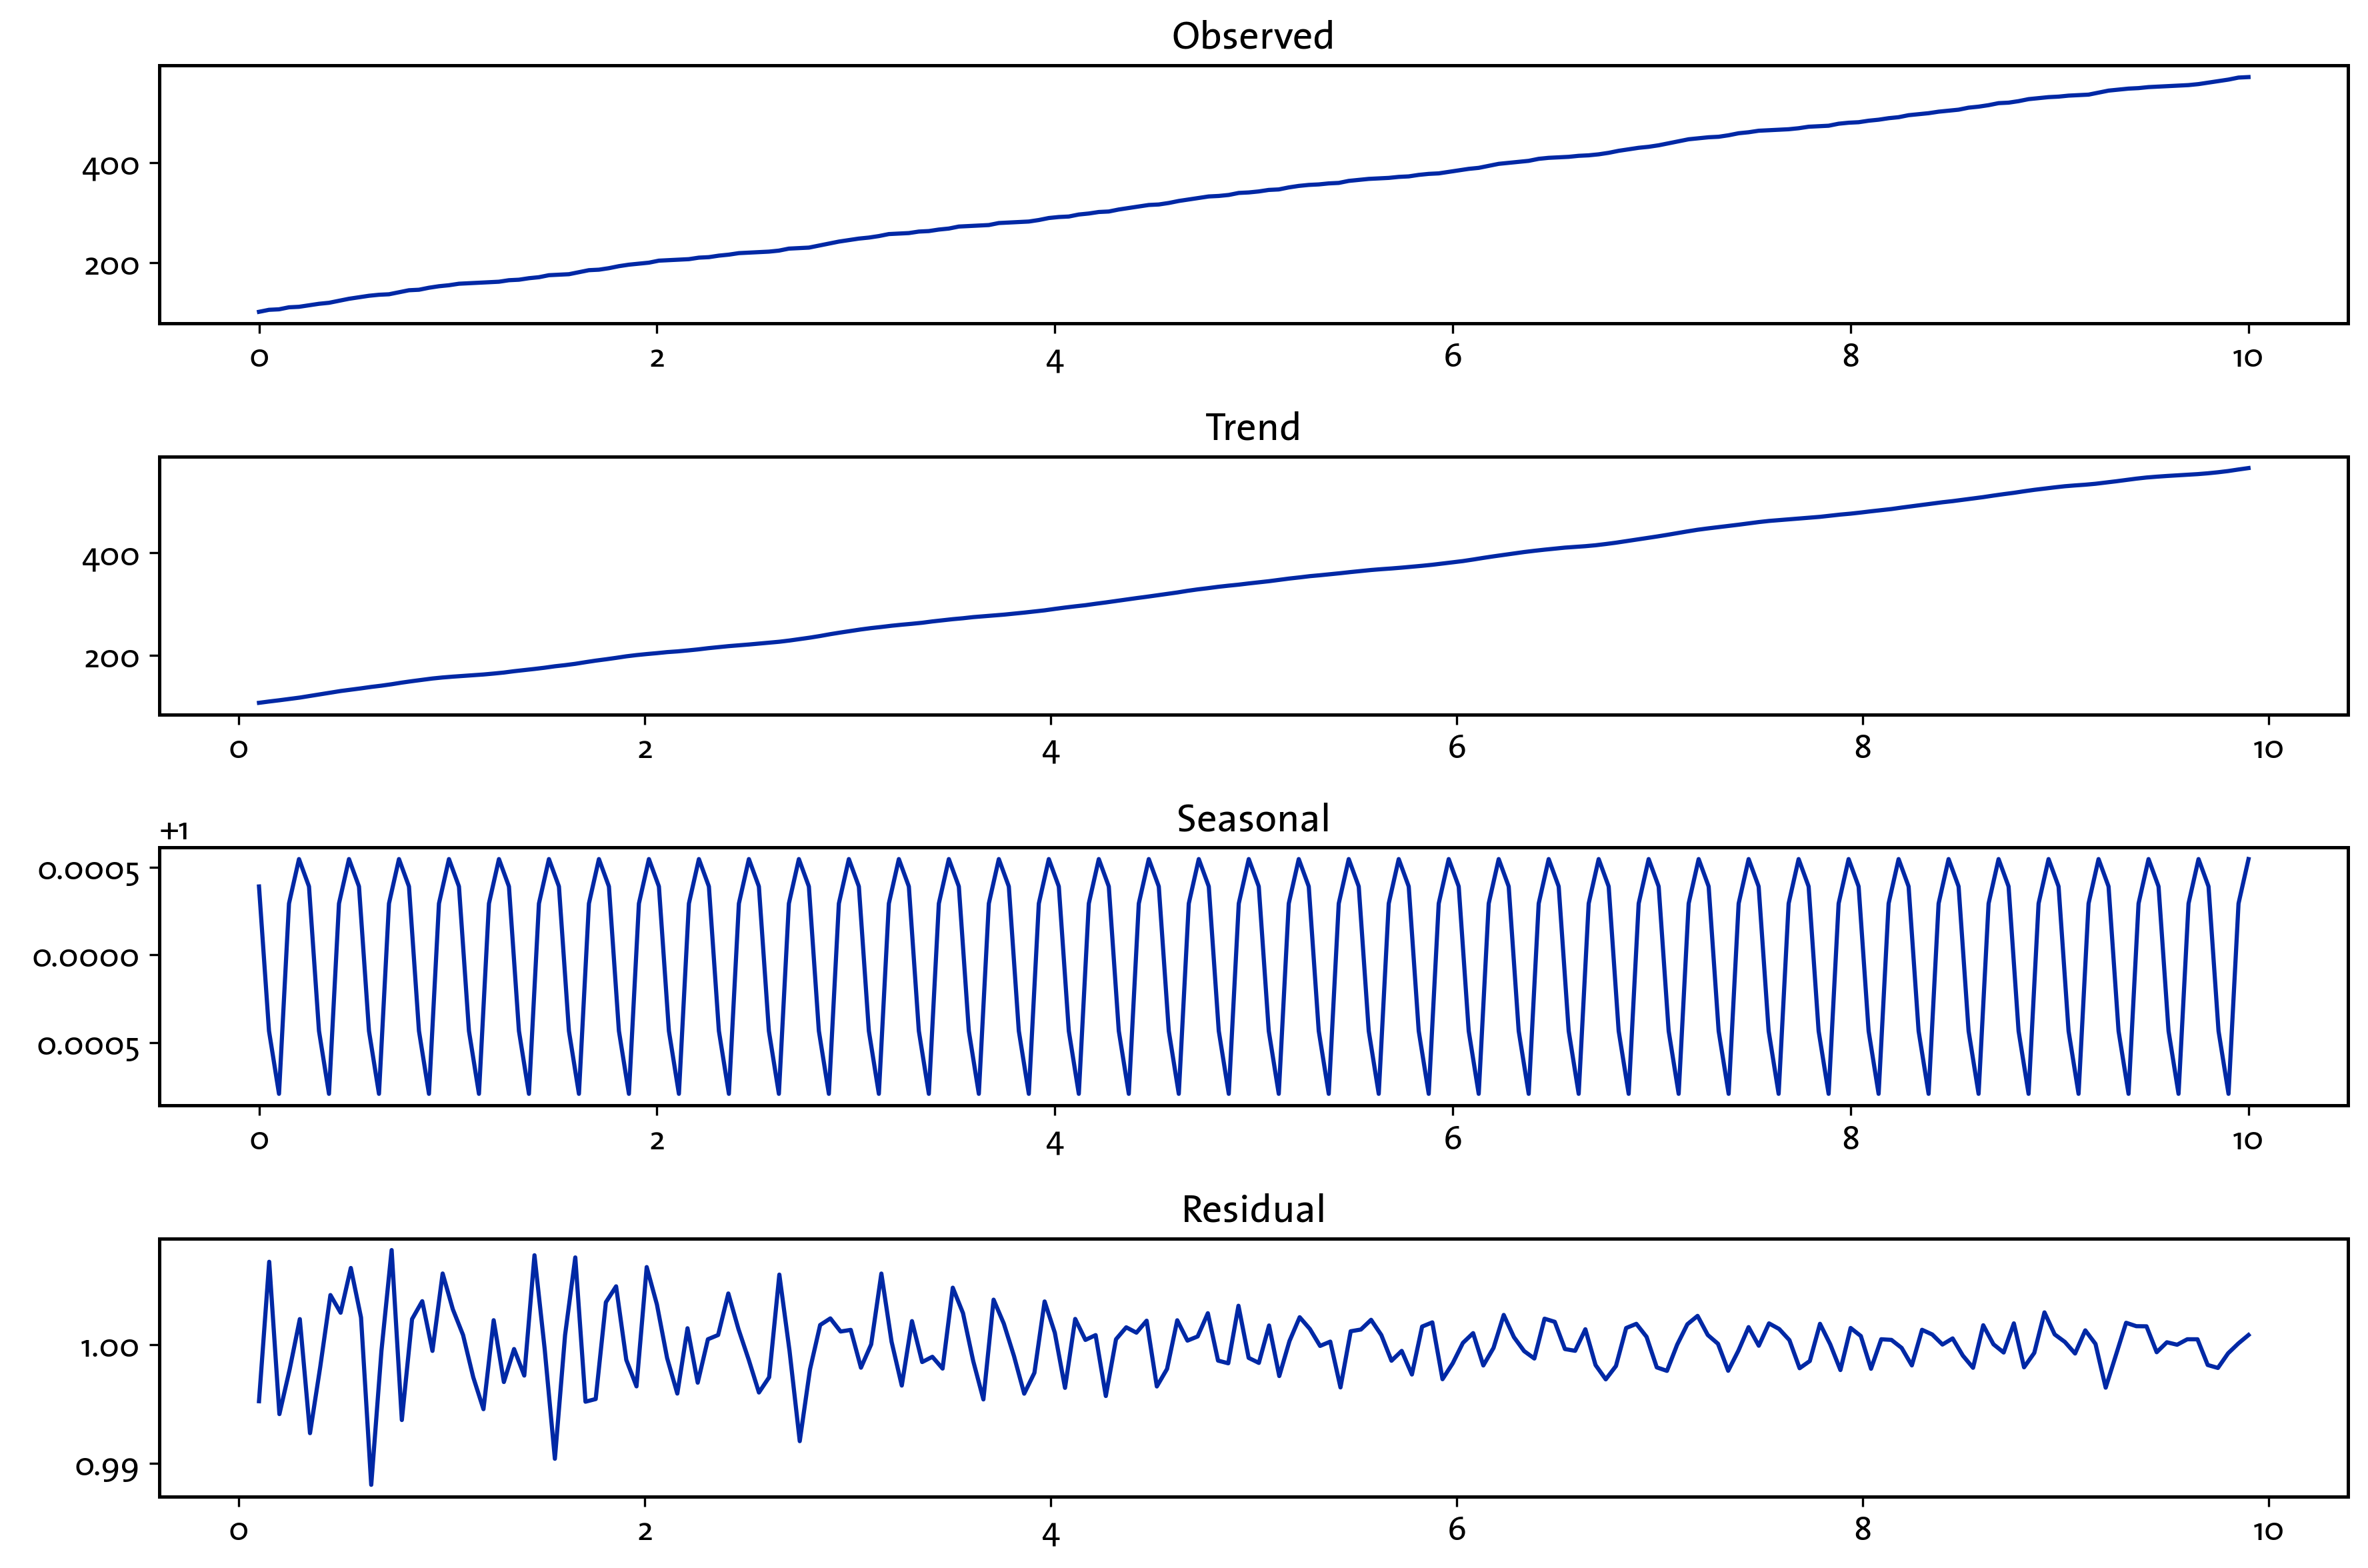

In [148]:
#t,y 组成 dataframe
df = pd.DataFrame({'t':t, 'y':y})
df=df.set_index('t')
result = seasonal_decompose(df, model='multiplicative',period=5)  

# 绘制分解后的结果
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()
